In [1]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats

# Colorectal data analysis

In [50]:
# get names of nrf2 target genes
nrf2_names = pd.read_csv("./data/nrf2 target genes.csv", index_col=None, header= None).T
nrf2_names = nrf2_names.loc[0].to_list()

ox_stress = pd.read_csv("./data/oxstress genes.csv", index_col=None, header= 0)
ox_stress = ox_stress['NRF2 subset'].dropna().tolist()

targets = list(set(["G6PD", "RRM2B"] +  ox_stress))

In [51]:
print(len(targets))
print(len(ox_stress))

52
51


In [52]:
# # get phenotypes of samples
# pheno = pd.read_csv("COADREAD_data_clinical_sample.txt", index_col=1,header = 4, sep = "\t")
# pheno = pheno[["SAMPLE_TYPE"]]
# pheno

In [53]:
# pheno_filtered = pheno.dropna()
# pheno_filtered

In [54]:
# # from UCSC xena
# xena = pd.read_csv("TCGA.COADREAD.sampleMap_HiSeqV2",index_col=0, sep = "\t")
# def pow_2(x):
#     return 2**x
# xena = xena.apply(pow_2)
# xena.sort_index()
# xena

In [59]:
# from cbioportal
cbio = pd.read_csv("./data/COADREAD_data_mrna_seq_v2_rsem.txt", index_col=0, sep = "\t").drop(["Entrez_Gene_Id"], axis=1) # gene x patient
cbio = cbio[cbio.index.notnull()]
cbio.sort_index(inplace=True) # genes x patients
cbio

,TCGA-3L-AA1B-01,TCGA-4N-A93T-01,TCGA-4T-AA8H-01,TCGA-5M-AAT4-01,TCGA-5M-AAT5-01,TCGA-5M-AAT6-01,TCGA-5M-AATA-01,TCGA-5M-AATE-01,TCGA-A6-2675-01,TCGA-A6-2682-01,...,TCGA-AG-A01N-01,TCGA-AG-A01W-01,TCGA-AG-A01Y-01,TCGA-AG-A020-01,TCGA-AG-A025-01,TCGA-AG-A026-01,TCGA-AG-A02G-01,TCGA-AG-A02N-01,TCGA-AG-A02X-01,TCGA-AG-A032-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,22.1470,171.2680,20.9980,6.4587,14.8384,49.8017,21.4195,9.6107,22.1173,27.7957,...,28.648632,14.213148,20.361928,4.479873,21.674028,18.887585,12.434922,6.936515,16.165630,22.836611
A1CF,220.9870,100.6290,174.0080,151.4630,255.7150,0.0000,180.1190,106.4040,152.6630,252.2200,...,355.438651,419.780727,19.486773,457.556518,182.038533,249.519138,238.629796,174.525498,191.864642,159.905526
A2BP1,2.4178,10.1597,0.7311,1.7212,2.4731,3.2812,0.3976,7.5513,10.2495,0.0000,...,3.491189,-0.330564,-0.330564,2.796757,0.296385,-0.330564,-0.330564,1.183092,75.017749,23.387740
A2LD1,177.4080,371.3640,295.6750,127.4830,105.9410,90.1274,194.0600,160.3890,126.8730,177.5320,...,51.486871,139.230385,172.838955,85.602168,280.602666,230.647330,282.865728,111.407100,70.135640,141.760142
A2M,15911.5000,1494.3300,1333.5700,2424.2600,2398.3400,7231.6500,8478.2800,4059.8400,11420.6000,3860.4800,...,5101.700157,2104.846555,3209.528006,1397.462448,4321.102468,4313.595650,1793.745097,2198.884111,1163.266249,2785.679374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,543.0370,290.7600,669.7130,445.3530,550.5040,492.8330,477.5350,759.2480,716.9250,654.7420,...,730.538983,866.110509,1281.631065,892.926058,623.683014,715.725841,417.929356,914.956269,544.076931,685.383167
ZYX,6259.1900,4653.1200,4460.6100,4190.1900,3878.2600,6165.9900,4216.3000,5513.8100,5451.6500,6227.2600,...,5429.155709,5416.137978,9236.399494,2416.364270,3847.373320,3804.441217,3529.241972,2768.765832,5001.453757,4643.428584
ZZEF1,1358.3200,1220.1300,3002.0100,1093.3700,1016.4300,1390.5600,744.3340,733.1620,1631.2900,829.2370,...,1057.025127,1016.476464,732.492887,1959.411854,1865.678814,1159.494367,1767.341263,1151.317795,1822.211921,2125.966458


In [60]:
# subset to get relevant genes
df_filtered = cbio.loc[targets]
# print(df_filtered.shape)

# # check for nan values
# na_filter = df_filtered.isnull().any()
# na_ls = na_filter[na_filter == True].index.to_list()
# print(na_ls)
# # # ox_stress = [ele for ele in ox_stress if ele not in na_ls]
# # # print(ox_stress)

df_filtered.dropna(inplace=True, axis = 1)
# m = df_filtered.mean()
# for na_col in na_ls:
#     df_filtered[na_col] = df_filtered[na_col].fillna(mean_ls[na_col])
df_filtered = df_filtered.T # patients x genes
# df_filtered.isna().any().sum()

In [61]:
# # subset to get relevant genes
# df_filtered = cbio.loc[targets]
# # print(df_filtered.shape)

# # # check for nan values
# # na_filter = df_filtered.T.isnull().any()
# # na_ls = na_filter[na_filter == True].index.to_list()
# # print(na_ls)
# # # ox_stress = [ele for ele in ox_stress if ele not in na_ls]
# # # print(ox_stress)

# # df_filtered.dropna(inplace=True, axis = 1)


# df_filtered = df_filtered.T # patients x genes
# print(df_filtered.shape)
# df_filtered.isna().sum()



In [62]:
# scale numerical data
df_filtered = np.log10(df_filtered+1)
df_filtered

Hugo_Symbol,ME1,CBR1,FTL,GSTM3,AKR1C1,PTGR1,TXNRD1,GSTCD,GPX2,GSTM2,...,GSTP1,GSTO1,GSTA3,HMOX1,SLC6A9,GSTTP1,NQO2,GSTA4,SLC40A1,SRXN1
TCGA-3L-AA1B-01,2.419303,2.962665,4.665969,2.542426,1.791890,2.817691,3.370913,2.367557,4.079463,2.267725,...,3.848060,3.133938,0.0,2.422491,2.107969,0.0,2.560706,2.205678,3.669385,3.107380
TCGA-4N-A93T-01,2.269067,3.332548,4.852739,2.470037,2.294753,2.763503,3.510479,2.079228,4.241915,2.227568,...,3.691471,3.381283,0.0,1.998668,2.566738,0.0,2.679446,2.334059,3.959465,3.094604
TCGA-4T-AA8H-01,2.879088,3.110320,4.316583,1.763638,1.717495,2.530855,3.429649,2.379030,4.288390,1.972449,...,4.043787,3.332247,0.0,2.300741,2.664468,0.0,2.453236,2.380354,3.731306,2.847334
TCGA-5M-AAT4-01,2.983881,3.213183,4.569590,2.753457,1.995575,2.710886,3.326199,2.474700,4.200322,2.075182,...,3.960373,3.375098,0.0,2.294936,2.353073,0.0,2.678822,2.353364,3.198231,3.137462
TCGA-5M-AAT5-01,2.490161,2.882536,4.806991,1.961488,1.906511,2.640729,3.499224,2.555215,4.104825,1.947171,...,4.031267,2.474598,0.0,2.389767,2.771147,0.0,2.575092,2.427480,3.504029,2.852031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-F5-6814-01,3.014235,3.110216,4.681109,2.306862,1.594970,2.497710,3.393401,2.288209,4.260922,1.884451,...,3.986591,3.426632,0.0,3.053589,2.406544,0.0,2.804629,2.645821,3.521171,3.140074
TCGA-F5-6861-01,2.960734,3.132311,4.564241,2.424321,1.997285,2.991578,3.357348,2.538845,4.095187,1.584666,...,3.966332,3.150873,0.0,2.646599,2.486231,0.0,2.364005,2.391722,3.484115,3.129841
TCGA-F5-6863-01,2.652922,2.858593,4.815624,2.579992,1.756893,2.572280,3.312319,1.929495,4.147587,1.822348,...,4.056604,3.209703,0.0,2.102609,2.629107,0.0,2.693017,1.988035,3.393375,3.166812
TCGA-F5-6864-01,2.706351,3.209370,4.794380,2.479331,1.741354,3.040859,3.271058,2.318147,4.070278,2.158583,...,3.810343,3.166859,0.0,2.732686,2.133418,0.0,2.080006,2.277595,3.615520,2.701802


In [63]:
# for each sequenced gene were rescaled to set the median equal to 1
data=((df_filtered-df_filtered.mean())/df_filtered.std())+1


In [64]:
data.head()

Hugo_Symbol,ME1,CBR1,FTL,GSTM3,AKR1C1,PTGR1,TXNRD1,GSTCD,GPX2,GSTM2,...,GSTP1,GSTO1,GSTA3,HMOX1,SLC6A9,GSTTP1,NQO2,GSTA4,SLC40A1,SRXN1
TCGA-3L-AA1B-01,0.196663,0.443268,0.973717,1.343860,0.660578,1.396890,0.596214,0.410080,1.060834,1.603509,...,0.503107,0.342399,0.887961,0.166262,-0.230273,0.873459,0.981211,0.713442,1.261323,1.362820
TCGA-4N-A93T-01,-0.265235,2.100576,1.964479,1.190249,1.952228,1.117796,1.675572,-1.474827,1.573009,1.505170,...,-0.220125,1.781251,0.887961,-1.270451,1.497360,0.873459,1.522784,1.297294,2.198252,1.296705
TCGA-4T-AA8H-01,1.610262,1.104857,-0.879684,-0.308743,0.469488,-0.080452,1.050459,0.485080,1.719535,0.880421,...,1.407096,1.495997,0.887961,-0.246458,1.865392,0.873459,0.491036,1.507832,1.461321,0.017063
TCGA-5M-AAT4-01,1.932444,1.565747,0.462454,1.791671,1.183761,0.846795,0.250412,1.110509,1.441877,1.131999,...,1.021838,1.745273,0.887961,-0.266138,0.692741,0.873459,1.519940,1.385087,-0.260454,1.518498
TCGA-5M-AAT5-01,0.414514,0.084240,1.721803,0.111100,0.954993,0.485450,1.588525,1.636867,1.140794,0.818520,...,1.349273,-3.493104,0.887961,0.055328,2.267125,0.873459,1.046824,1.722149,0.727241,0.041367


In [65]:
# take only nrf2 target genes
oxstress = data[ox_stress]
data.drop(ox_stress, inplace = True, axis = 1)
oxstress["os"] = oxstress.mean(axis = 1) # mean is horizontal
data = pd.concat([data, oxstress], axis = 1) # patients x genes 
data.head()


/var/folders/mp/lfr86vf57gzgqs4tr6qd5bs80000gn/T/ipykernel_98906/1195341641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oxstress["os"] = oxstress.mean(axis = 1) # mean is horizontal


Hugo_Symbol,RRM2B,CAT,PRDX1,PRDX6,GPX2,GCLC,GCLM,GSR,SLC6A9,SLC7A11,...,GSTM5,GSTO1,GSTO2,GSTP1,GSTT1,GSTT2,GSTTP1,GSTTP2,GSTZ1,os
TCGA-3L-AA1B-01,0.494420,0.069221,-0.444111,-0.984477,1.060834,1.658381,1.173143,1.687385,-0.230273,0.627059,...,2.481130,0.342399,1.301150,0.503107,1.424666,1.941361,0.873459,0.717153,1.480506,0.825338
TCGA-4N-A93T-01,-0.517477,0.728079,0.587252,1.358891,1.573009,1.051108,-1.168043,-1.184766,1.497360,0.037116,...,0.463470,1.781251,1.667277,-0.220125,1.680763,0.382191,0.873459,0.717153,-0.165177,1.045695
TCGA-4T-AA8H-01,1.026069,1.610466,0.654819,0.249787,1.719535,0.096392,0.578010,2.027582,1.865392,0.128801,...,-0.826775,1.495997,1.798431,1.407096,1.729097,-0.995050,0.873459,0.717153,2.710078,0.860287
TCGA-5M-AAT4-01,0.714446,-0.490611,-0.008152,1.697454,1.441877,0.844493,-0.331888,0.733393,0.692741,1.561193,...,0.997706,1.745273,2.097531,1.021838,-1.114015,2.711304,0.873459,0.717153,1.944885,0.899120
TCGA-5M-AAT5-01,-0.373161,1.382432,1.755963,1.638091,1.140794,1.107308,-0.601678,0.364636,2.267125,1.764651,...,0.298012,-3.493104,0.802601,1.349273,-0.952662,1.429936,0.873459,0.717153,-0.107948,0.907244


In [66]:
#find line of best fit
y, x = data["os"].to_numpy(), data["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)

# get r sq val
r = np.corrcoef(x, y)[0, 1]


#find p-value
n = data.shape[0]
t = (r-math.sqrt(n-2))/math.sqrt(1-(r**2))
p = stats.t.sf(abs(t), df=n)*2

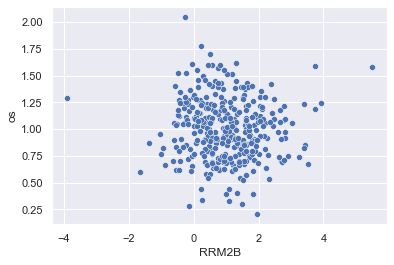

In [67]:
# scatter plot for RRM2B against NRF2 activity
sns.set_style("whitegrid")
sns.set()
sns.scatterplot(data=data, x="RRM2B", y="os")
# axs[cancer.index(c)].plot(x, a*x+b, color="black")
# axs[cancer.index(c)].set_ylabel("NRF2 activity (based on 53 genes)",fontsize = 18)
# axs[cancer.index(c)].set_xlabel("RRM2B expression" + " \n (r = " + str(round(r, 4)) + "," + " p = " + str(round(p, 4)) +")",rotation=10,fontsize = 15)
# axs[cancer.index(c)].set_title(cancer[cancer.index(c)], fontsize = 20)
# axs[cancer.index(c)].tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [68]:
r

-0.054074870046397945

In [ ]:
# # filter for only cancer samples
# data = pd.concat([cbio.T, pheno_filtered], axis = 1, join='inner')
# data

In [ ]:
# ls1= cbio.index.to_list()
# ls2 = xena.index.to_list()
# print(len(ls1))
# print(len(ls2))

# ls3 = list(set(ls1).intersection(set(ls2)))
# print(ls3)
# print(len(ls3))


In [ ]:
# xena = xena.loc[ls3]
# cbio = cbio.loc[ls3]

In [ ]:
# get names of nrf2 target genes
nrf2_names = pd.read_csv("nrf2 target genes.csv", index_col=None, header= None).T
nrf2_names = nrf2_names.loc[0].to_list()

## Cbio analysis

In [ ]:
cbio_filtered = cbio.loc[nrf2_names + ["RRM2B"]]
cbio_filtered = cbio_filtered.T
cbio_filtered = np.log10(cbio_filtered+1)
cbio_filtered


In [ ]:
info = cbio_filtered.describe().T
info.head()

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
sns.histplot(info, x="min",ax= axs[0])
sns.histplot(info, x="50%",ax= axs[1])
sns.histplot(info, x="max",ax= axs[2])
sns.histplot(info, x="mean",ax= axs[3])

In [ ]:

sns.displot(cbio_filtered, x="ABCC5")

In [ ]:
# for each sequenced gene were rescaled to set the median equal to 1
data=((cbio_filtered-cbio_filtered.median())/cbio_filtered.std())+1
data_info = data.describe().T
data_info.head()

In [ ]:
# data = data.T
data.head()

In [ ]:
# # HIF-activity was quantified by averaging the normal- ized expression of 44 target genes
# rrm2b = data.loc[["RRM2B"]]
# g6pd = data.loc[["G6PD"]]
# print(g6pd, rrm2b)

In [ ]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

In [ ]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD")
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')
plt.plot(x, a*x+b, color="black")
plt.show()



In [ ]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(x, y)

Less RRM2B means more G6PD

## xena analysis

In [ ]:
xena_filtered = xena.loc[nrf2_names + ["RRM2B"]]
xena_filtered = xena_filtered.T
xena_filtered = np.log10(xena_filtered+1)
xena_filtered


In [ ]:
info = xena_filtered.describe().T
info.head()

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
sns.histplot(info, x="min",ax= axs[0])
sns.histplot(info, x="50%",ax= axs[1])
sns.histplot(info, x="max",ax= axs[2])
sns.histplot(info, x="mean",ax= axs[3])

In [ ]:
# for each sequenced gene were rescaled to set the median equal to 1
data=((xena_filtered-xena_filtered.median())/xena_filtered.std())+1
data_info = data.describe().T
data_info.head()

In [ ]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

In [ ]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD")
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')
plt.plot(x, a*x+b, color="black")
plt.show()



In [ ]:
y, x = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(x, y)

# Pancancer data analysis

In [ ]:
# load pancancer data
df = pd.read_csv("EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena", index_col=0, sep = "\t")
df.info()

In [ ]:
# subset to get relevant genes
df_filtered = df.loc[["G6PD","RRM2B"]]
df_filtered.isnull().values.any()

In [ ]:
# get phenotypes of samples
pheno = pd.read_csv("TCGA_phenotype_denseDataOnlyDownload.tsv", index_col=0, sep = "\t")
print(pheno.isnull().values.sum())
pheno_filtered = pheno.dropna()
print(pheno_filtered.dtypes)


In [ ]:
# scale numerical data
df_filtered = df_filtered/math.log2(10)

# add the labels on which is normal vs cancer
df2 = pd.concat([df_filtered, pheno_filtered.T], join="inner")

In [ ]:
# transpose to patient x gene
df2 = df2.T  

# drop normal samples
df2.drop(df2.loc[df2["sample_type"] == "Solid Tissue Normal"].index, inplace=True)
df2.info()

In [ ]:
# cast object type to float type
df2 = df2.astype({'G6PD': 'float64', 'RRM2B': 'float64'})
df2.info()


In [ ]:
# get the data for the two genes
data = df2[['G6PD', 'RRM2B']]

# for each sequenced gene were rescaled to set the median equal to 1
data=(data-data.median()+1)/data.std()

data.head() # patient x gene

In [ ]:
x, y = data["G6PD"].to_numpy(), data["RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

In [ ]:

fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="G6PD", color=".55", ax=axs)
axs.set_ylabel("G6PD expression")
axs.set_xlabel("RRM2B expression")
fig.suptitle('RRM2B and G6PD expression in TCGA colorectal cancer data')

plt.plot(x, a*x+b, color="black")
plt.show()


In [ ]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

In [ ]:
patients = data.index.to_list()

## Add NRF2 dimension

In [ ]:
# get names of nrf2 target genes
nrf2_names = pd.read_csv("nrf2 target genes.csv", index_col=None, header= None).T
nrf2_names = nrf2_names.loc[0].to_list()

In [ ]:
# get nrf2 target genes
nrf2 = df.loc[nrf2_names]

# get only patients with cancer samples
nrf2 = nrf2[patients]

nrf2.head()


In [ ]:
# scale numerical data to log10
nrf2 = nrf2/math.log2(10)

# for each sequenced gene were rescaled to set the median equal to 1
nrf2=(nrf2-nrf2.median()+1)/nrf2.std()
nrf2.describe()

# for each patient, average across all normalised expression values
nrf2 = nrf2.T
nrf2["NFE2L2"] = nrf2.mean(axis=1)
nrf2 = nrf2.T
nrf2.head() # genes x patients


In [ ]:
print(nrf2.loc["NFE2L2"].T.describe()) # to get the interquartile range

# bin the patients into quartiles based on NRF2 activity
nrf2 = nrf2.T # patients x genes
nrf2["NRF2 activity"] = pd.cut(nrf2["NFE2L2"],
                bins=[ 0.408170, 1.225746, 1.616076, 2.409622],
                labels=["Bottom 25%", "-", "Top 25%"])
nrf2 = nrf2.T # genes x patients

# trabspose data to drop nan values
data = data.T # genes x patients
data = pd.concat([data, nrf2]).dropna(axis=1)


data.head()

In [ ]:
data = data.T # patients x genes

# split data into quartiles into different dataframe based on NRF2 activity
low = data.loc[data["NRF2 activity"] == "Bottom 25%"].drop(['NRF2 activity'], axis=1).astype(float)
med = data.loc[data["NRF2 activity"] == "-"].drop(['NRF2 activity'], axis=1).astype(float)
high = data.loc[data["NRF2 activity"] == "Top 25%"].drop(['NRF2 activity'], axis=1).astype(float)
data = data.drop(['NRF2 activity'], axis=1).astype(float)





In [ ]:
data

In [ ]:
x, y = data["RRM2B"].to_numpy(), data["G6PD"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)

fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", color=".55", ax=axs[4])
axs[0].plot(x, a*x+b, color="black")
axs[0].set_title("Combined expression (no colors)")
axs[0].set_ylabel("G6PD expression")
axs[0].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[0].set_xlim(-6.5, 8.5)
# axs[0].set_ylim(-1.5, 8)

sns.scatterplot(data=data, x="RRM2B", y="G6PD", hue = nrf2.loc["NRF2 activity"], palette=['green','gray','red'],s=30, ax=axs[3])
axs[1].plot(x, a*x+b, color="black")
axs[1].set_title("Combined expression (different colors)")
axs[1].set_ylabel("G6PD expression")
axs[1].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[1].set_xlim(-6.5, 8.5)
# axs[1].set_ylim(-1.5, 8)

y, x = low["G6PD"].to_numpy(), low["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)
sns.scatterplot(data=data, x="RRM2B", y="G6PD", color="green", ax=axs[0])
axs[2].plot(x, a*x+b, color="black")
axs[2].set_title("Low NRF2 activity (bottom 25%)")
axs[2].set_ylabel("G6PD expression")
axs[2].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[2].set_xlim(-6.5, 8.5)
# axs[2].set_ylim(-1.5, 8)

y, x = med["G6PD"].to_numpy(), med["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)
sns.scatterplot(data=med, x="RRM2B", y="G6PD", color="gray", ax=axs[1])
axs[3].plot(x, a*x+b, color="black")
axs[3].set_title("Medium NRF2 activity")
axs[3].set_ylabel("G6PD expression")
axs[3].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[3].set_xlim(-6.5, 8.5)
# axs[3].set_ylim(-1.5, 8)

y, x = high["G6PD"].to_numpy(), high["RRM2B"].to_numpy()
a, b = np.polyfit(x, y, 1)
r = np.corrcoef(x, y)
sns.scatterplot(data=high, x="RRM2B", y="G6PD", color="red", ax=axs[2])
axs[4].plot(x, a*x+b, color="black")
axs[4].set_title("High NRF2 activity (top 25%)")
axs[4].set_ylabel("G6PD expression")
axs[4].set_xlabel("RRM2B expression (r = " + str(round(r[0,1],2)) + ")")
# axs[4].set_xlim(-6.5, 8.5)
# axs[4].set_ylim(-1.5, 8)





fig.suptitle('RRM2B and G6PD expression in TCGA pancancer data')

plt.show()


In [ ]:
X, y = data.loc[:,"G6PD"].to_numpy(), data.loc[:,"RRM2B"].to_numpy()
np.corrcoef(X, y)

-0.12274883 vs -0.1243346

Screening differentially regulated genes through a Signature Gene Screen (Including Heatmap Plot)
1. Normalise all values with (val-mean of that gene)/std of that gene
2. take an unweighted average across all genes for each patient

## RRM2B against NRF2 activity

In [ ]:
y, x = data["NFE2L2"].to_numpy(), data["RRM2B"].to_numpy()

#find line of best fit
a, b = np.polyfit(x, y, 1)

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True)
sns.set_style("whitegrid")
sns.scatterplot(data=data, x="RRM2B", y="NFE2L2", color="green", ax=axs)
plt.plot(x, a*x+b, color="black")
axs.set_ylabel("NRF2 activity (based on 53 genes)")
axs.set_xlabel("RRM2B expression")
fig.suptitle('TCGA pancancer data')
plt.show()

In [ ]:
np.corrcoef(x, y)

In [ ]:
data.shape